In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("processed_http_logs.csv")
df = df.drop(columns=["Unnamed: 0", "Label"], errors="ignore")
df.head()


,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,...,content,classification,URL,Method_code,url_length,suspicious_keyword_count,special_char_count,method_GET,method_POST,method_PUT
0,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,...,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,0,48,0,0,True,False,False
1,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,...,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...,0,126,0,1,True,False,False
2,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,...,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...,1,57,0,0,False,True,False
3,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,...,NaN,0,http://localhost:8080/tienda1/publico/autentic...,0,125,0,1,True,False,False
4,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,...,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...,1,61,0,0,False,True,False


In [3]:
features = [
    "url_length",
    "suspicious_keyword_count",
    "special_char_count",
    "method_GET",
    "method_POST",
    "method_PUT",
    "Method_code",
    "content_length"
]

X = df[features].fillna(0)  # Fill missing values if any
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["anomaly"] = iso_forest.fit_predict(X_scaled)  # -1 = anomaly, 1 = normal
df["anomaly_label"] = df["anomaly"].map({1: "Normal", -1: "Anomaly"})
df["anomaly_label"].value_counts()


anomaly_label
Normal     58650
Anomaly     2415
Name: count, dtype: int64

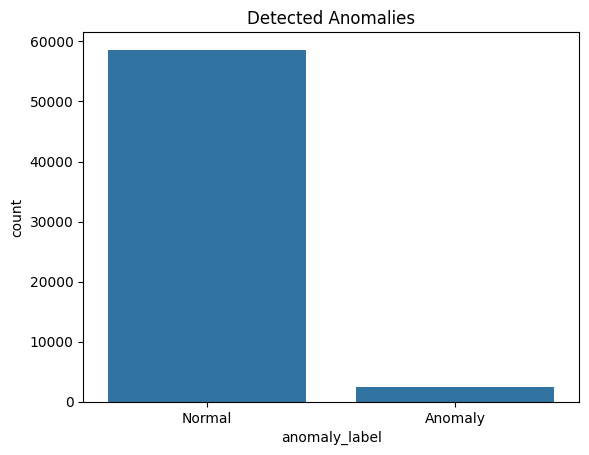

In [5]:
sns.countplot(data=df, x="anomaly_label")
plt.title("Detected Anomalies")
plt.show()


In [6]:
# View first 10 detected anomalies
df[df["anomaly"] == -1].head(10)


,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,...,URL,Method_code,url_length,suspicious_keyword_count,special_char_count,method_GET,method_POST,method_PUT,anomaly,anomaly_label
1454,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1C9A900384A751573C75B7B1896E7DAE,...,http://localhost:8080/tienda1/publico/registro...,0,327,0,9,True,False,False,-1,Anomaly
4022,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=C0816A615AB510420A488FF5BB38D506,...,http://localhost:8080/tienda1/miembros/editar....,0,339,0,8,True,False,False,-1,Anomaly
4694,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=CB2898E5A0163A10B3FB40D869670B65,...,http://localhost:8080/tienda1/publico/registro...,0,343,0,8,True,False,False,-1,Anomaly
10058,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=FFB5413A3948AC07F83B1D5E7AACB474,...,http://localhost:8080/tienda1/publico/registro...,0,345,0,9,True,False,False,-1,Anomaly
10922,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=AA3AEE438921E85250996D096EDE64F5,...,http://localhost:8080/tienda1/publico/registro...,0,308,0,9,True,False,False,-1,Anomaly
12974,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=994E47BD61B2668C8B8FC440872A6CA6,...,http://localhost:8080/tienda1/publico/registro...,0,356,0,7,True,False,False,-1,Anomaly
19490,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=BCA8E2686F3AD43F1D1E49E07F82E535,...,http://localhost:8080/tienda1/publico/registro...,0,332,1,5,True,False,False,-1,Anomaly
22370,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=FFA5756F06F87DAE8EBF2D7E141955B0,...,http://localhost:8080/tienda1/publico/registro...,0,354,0,8,True,False,False,-1,Anomaly
23894,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=C4820B377292F1C7D1EA7DE6663FE3AD,...,http://localhost:8080/tienda1/miembros/editar....,0,349,0,12,True,False,False,-1,Anomaly
26306,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=4B18E70462F6BC1AAEBE3070B60DED0F,...,http://localhost:8080/tienda1/miembros/editar....,0,334,0,8,True,False,False,-1,Anomaly


In [7]:
import joblib

# Save model and scaler
joblib.dump(scaler, "anomaly_detector/model/scaler.pkl")
joblib.dump(iso_forest, "anomaly_detector/model/isolation_model.pkl")


['anomaly_detector/model/isolation_model.pkl']